In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy

In [2]:
def load_logs(base_directory):
    logs_dict = {}

    for file_name in os.listdir(base_directory):
        file_path = os.path.join(base_directory, file_name)
        if file_name.endswith('.csv'):
            df = pd.read_csv(file_path)

        logs_dict[file_name] = df

    return logs_dict


all_logs = load_logs("measurements")

In [3]:
def calc_ki(means, alpha=0.05):
    c = scipy.stats.norm.ppf(1 - alpha / 2, loc=0, scale=1)
    s = np.std(means, ddof=1)
    mean = np.mean(means)
    erg = (s * c) / np.sqrt(len(means))
    return [mean - erg, mean + erg]

Erstelle Scatterplot für Ordner: T1_spinlock_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot für T1_spinlock_min_times.csv gespeichert als results/scatterplot_T1_spinlock_min_times.eps


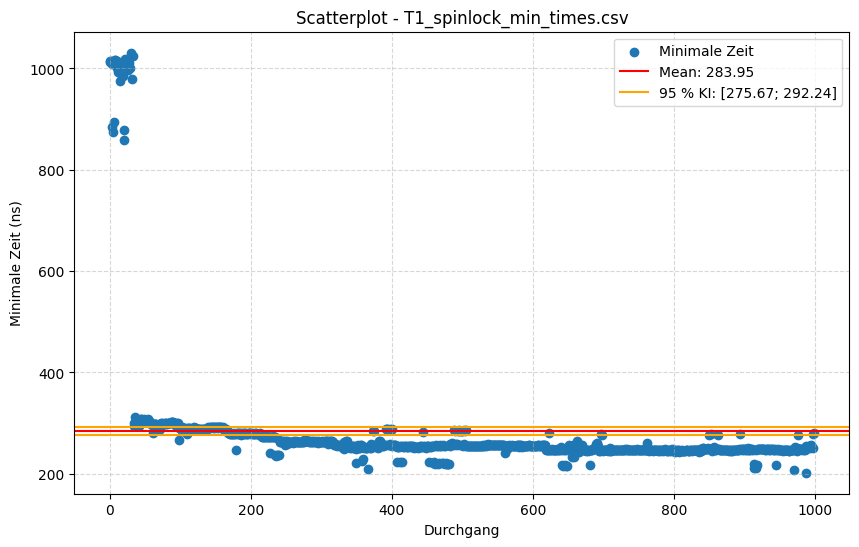

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T1_spinlock_sm_min_times.csv
Scatterplot für T1_spinlock_sm_min_times.csv gespeichert als results/scatterplot_T1_spinlock_sm_min_times.eps


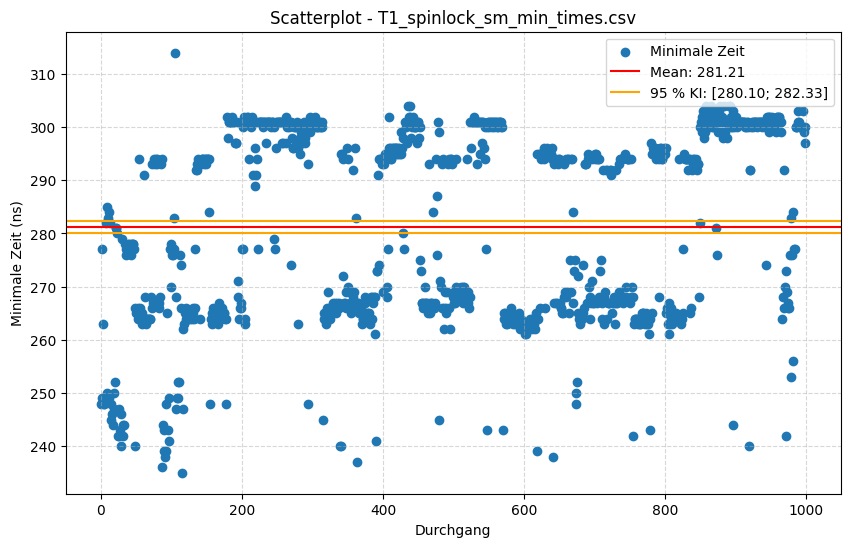

Erstelle Scatterplot für Ordner: T2_sema_1P_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot für T2_sema_1P_min_times.csv gespeichert als results/scatterplot_T2_sema_1P_min_times.eps


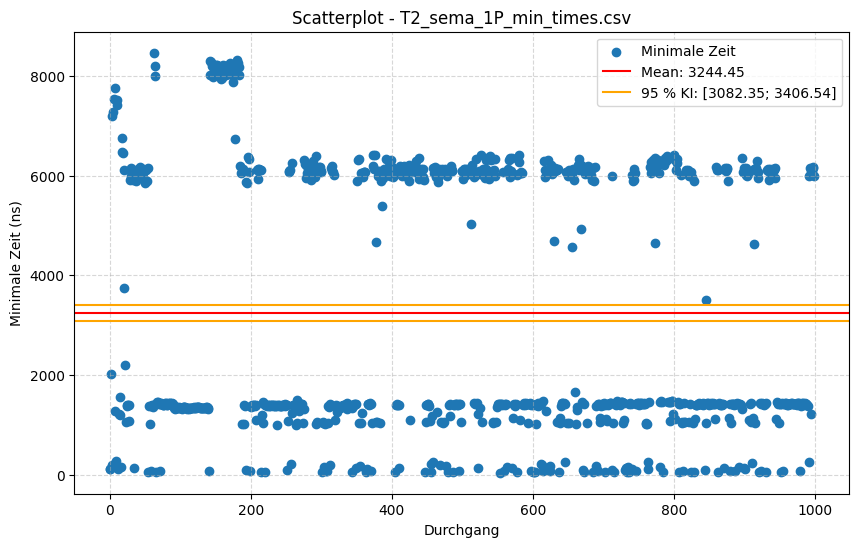

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T2_sema_2P_min_times.csv
Scatterplot für T2_sema_2P_min_times.csv gespeichert als results/scatterplot_T2_sema_2P_min_times.eps


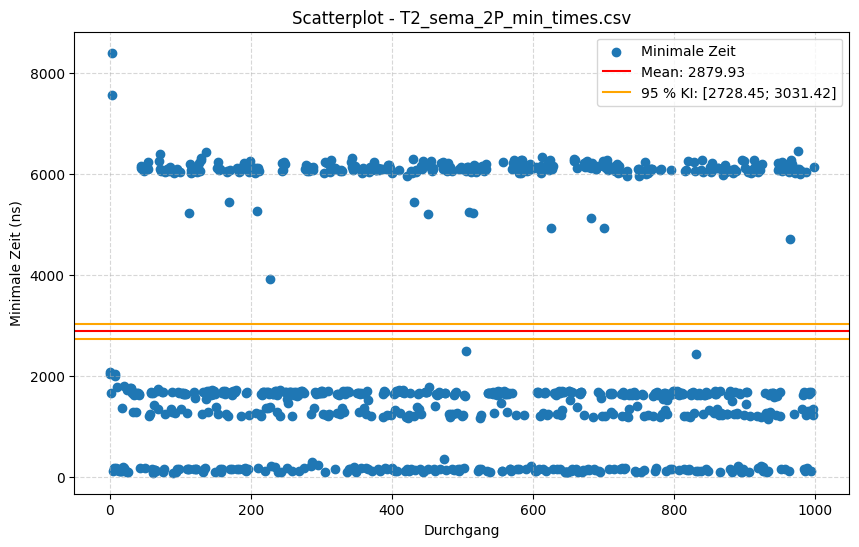

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T3_zmq_inproc_min_times.csv
Scatterplot für T3_zmq_inproc_min_times.csv gespeichert als results/scatterplot_T3_zmq_inproc_min_times.eps


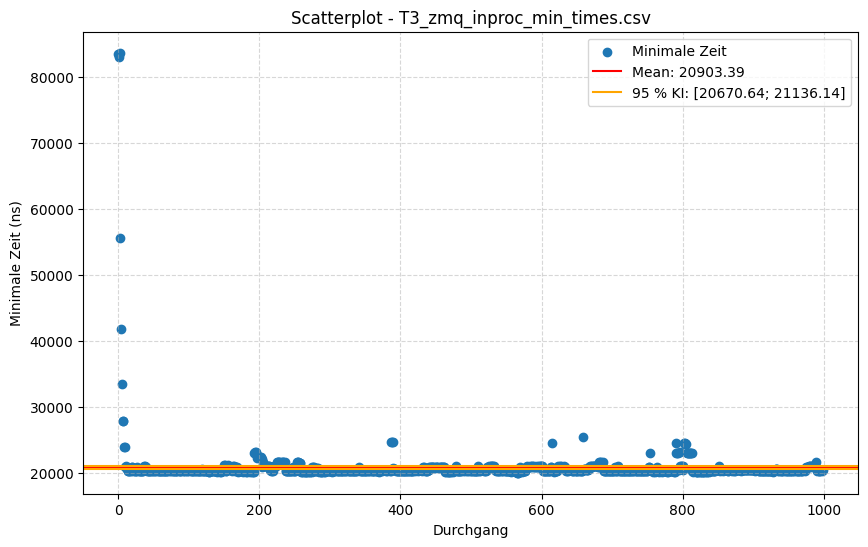

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T3_zmq_ipc_min_times.csv
Scatterplot für T3_zmq_ipc_min_times.csv gespeichert als results/scatterplot_T3_zmq_ipc_min_times.eps


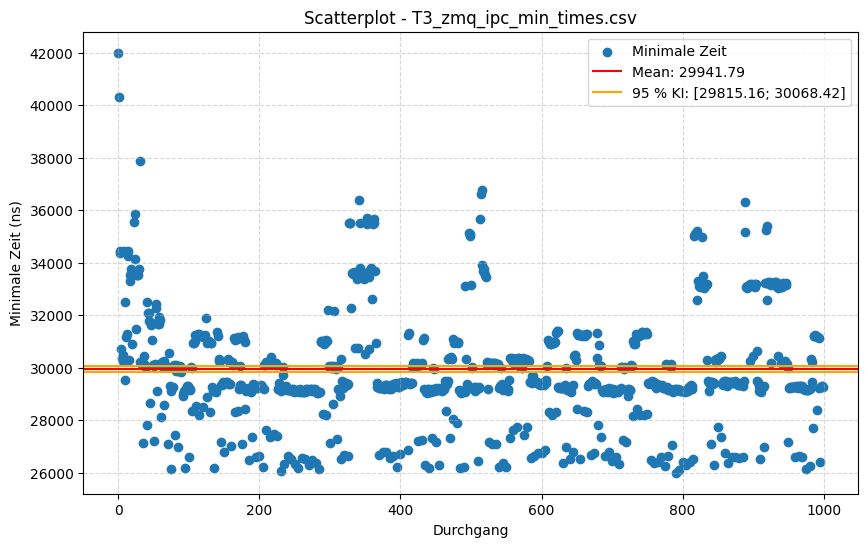

Erstelle Scatterplot für Ordner: T4_tcp_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot für T4_tcp_min_times.csv gespeichert als results/scatterplot_T4_tcp_min_times.eps


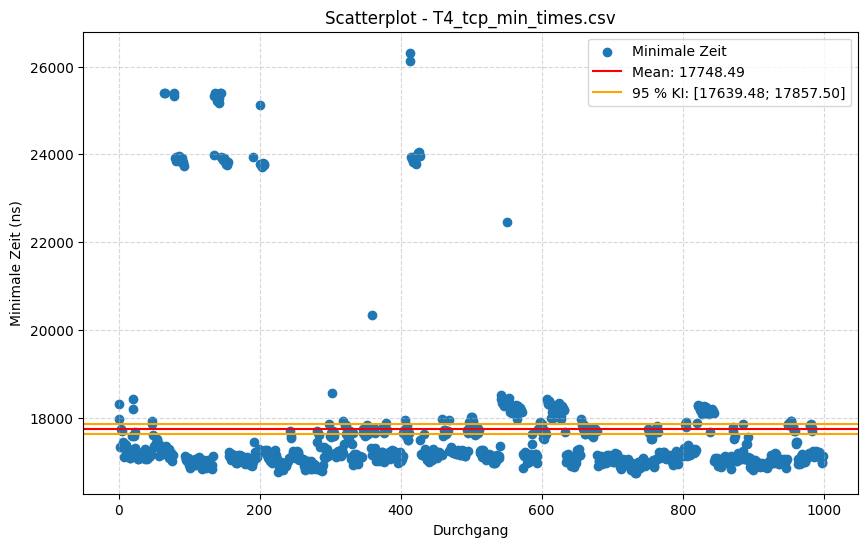

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot für Ordner: T4_zmq_min_times.csv
Scatterplot für T4_zmq_min_times.csv gespeichert als results/scatterplot_T4_zmq_min_times.eps


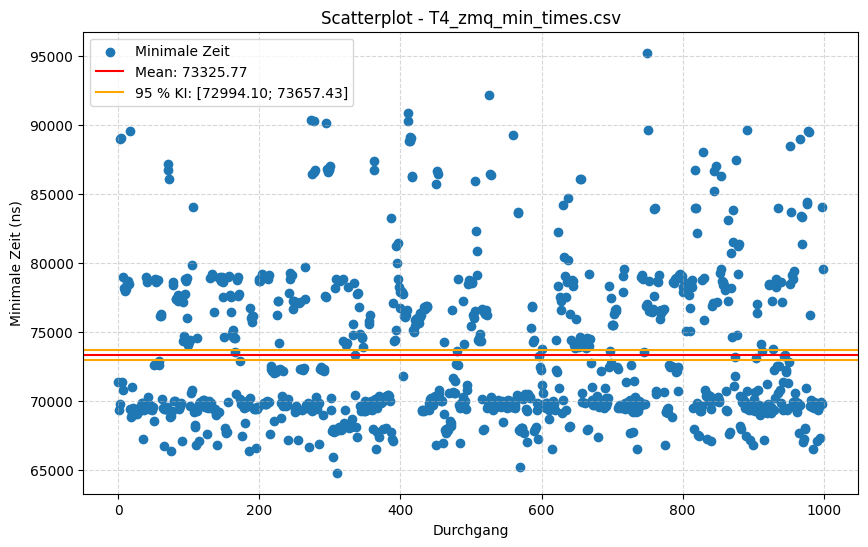

In [4]:
def plot_scatter(eventlogs_dict):
    for log_name, log in eventlogs_dict.items():
        print(f"Erstelle Scatterplot für Ordner: {log_name}")

        times = log['mintime']
        ki = calc_ki(times)  # Annahme: Diese Funktion ist definiert
        mean = times.mean()

        # Erstellen eines neuen Plots
        plt.figure(figsize=(10, 6))
        plt.scatter(range(len(times)), times, label='Minimale Zeit')

        # Gesamtdurchschnitt als horizontale Linie einzeichnen
        plt.axhline(mean, color='red', label=f'Mean: {mean:.2f}')
        plt.axhline(ki[0], color='orange', label=f'95 % KI: [{ki[0]:.2f}; {ki[1]:.2f}]')
        plt.axhline(ki[1], color='orange')

        # Titel, Achsenbeschriftung und Legende
        plt.title(f"Scatterplot - {log_name}")
        plt.xlabel("Durchgang")
        plt.ylabel("Minimale Zeit (ns)")
        plt.legend()
        plt.grid(True, linestyle="--", alpha=0.5)

        # Speichern der Grafik
        filename = f"results/scatterplot_{log_name.replace(' ', '_')[:-4]}.eps"
        plt.savefig(filename, format='eps')
        print(f"Scatterplot für {log_name} gespeichert als {filename}")
        plt.show()
        # Schließen der Grafik, um Speicher freizugeben
        plt.close()


# Beispielaufruf
plot_scatter(all_logs)


Erstelle Scatterplot und Histogramm für Ordner: T1_spinlock_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T1_spinlock_min_times.csv gespeichert als results/scatter_histogram_T1_spinlock_min_times.eps


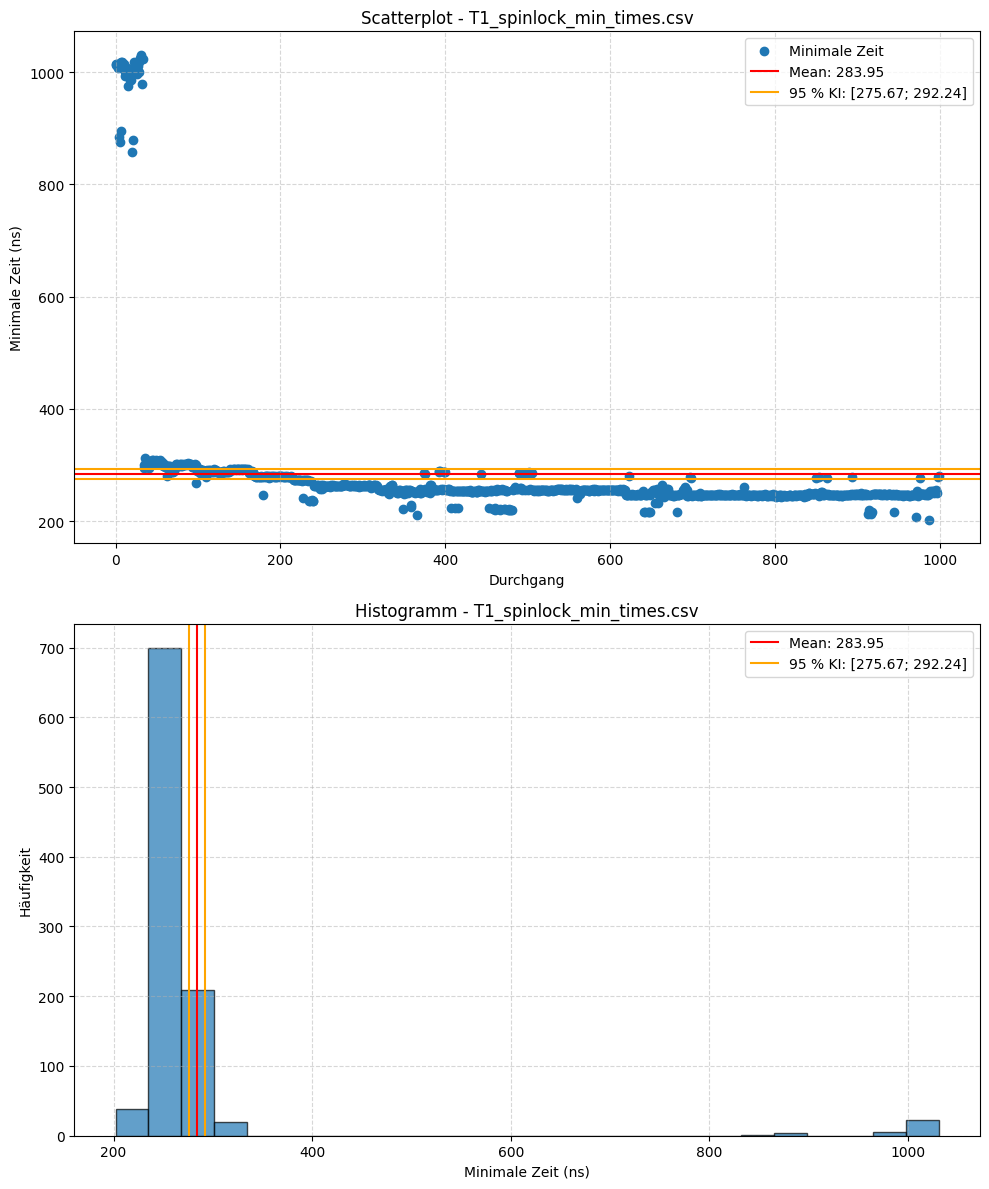

Erstelle Scatterplot und Histogramm für Ordner: T1_spinlock_sm_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T1_spinlock_sm_min_times.csv gespeichert als results/scatter_histogram_T1_spinlock_sm_min_times.eps


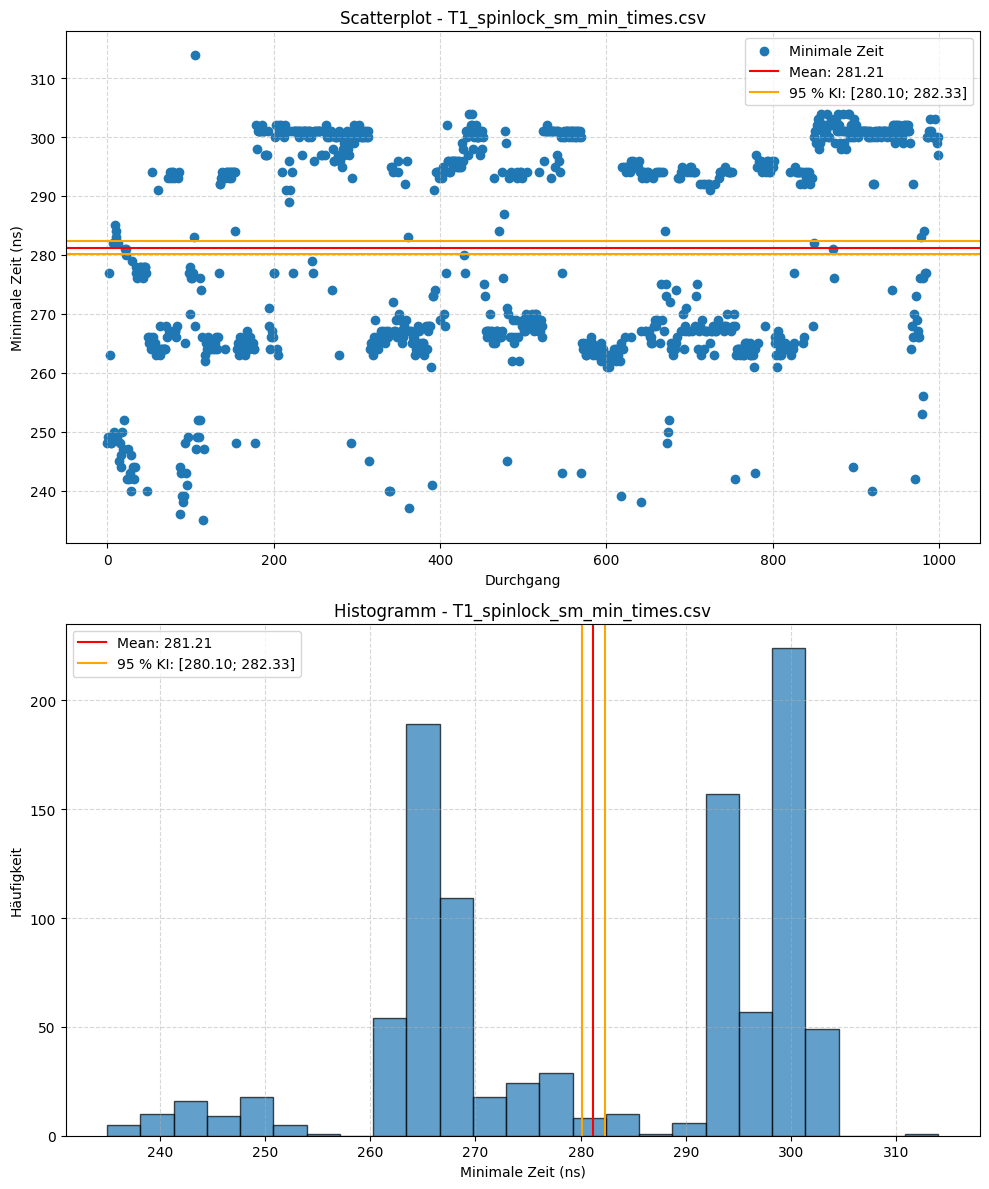

Erstelle Scatterplot und Histogramm für Ordner: T2_sema_1P_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T2_sema_1P_min_times.csv gespeichert als results/scatter_histogram_T2_sema_1P_min_times.eps


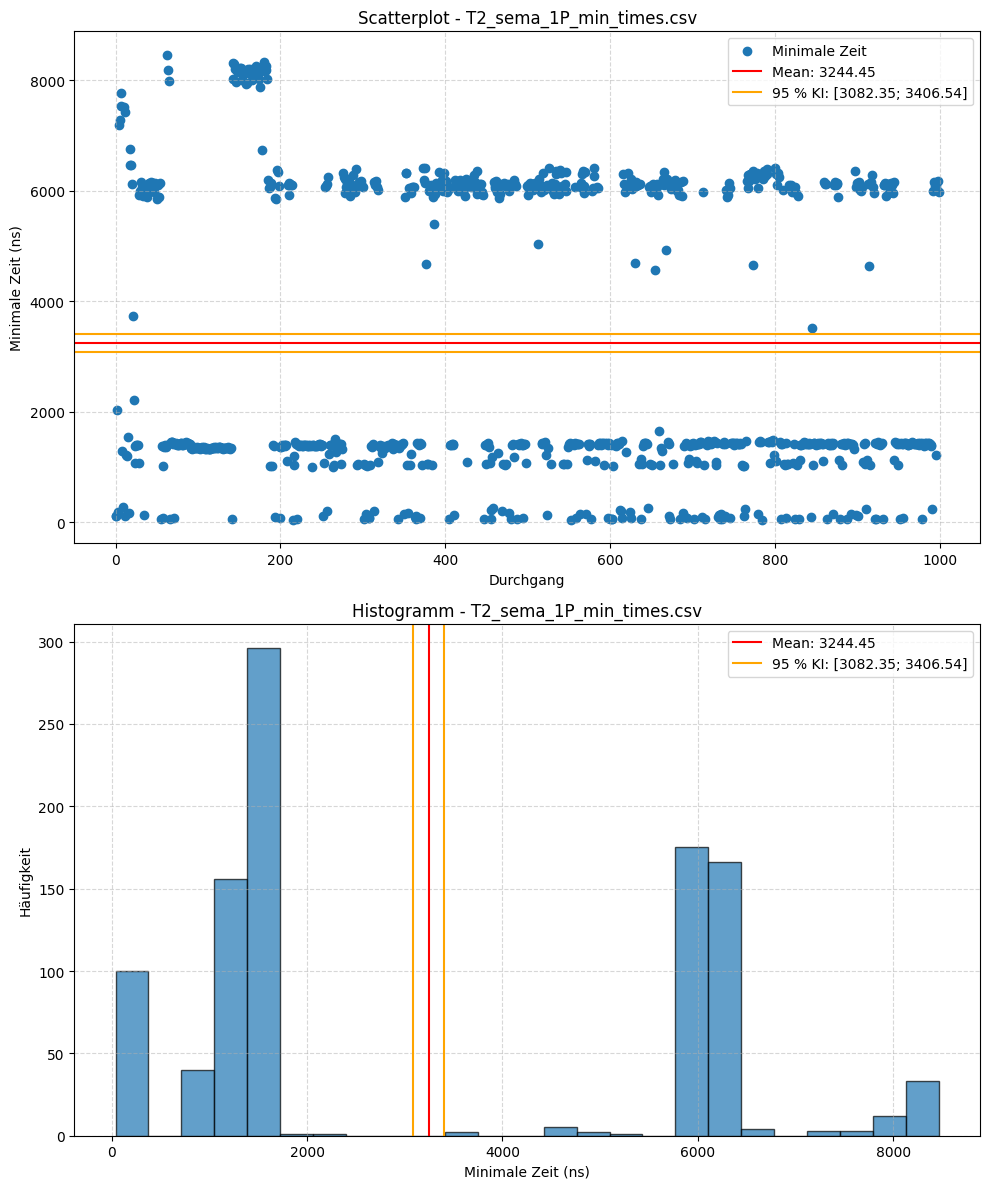

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Erstelle Scatterplot und Histogramm für Ordner: T2_sema_2P_min_times.csv
Scatterplot und Histogramm für T2_sema_2P_min_times.csv gespeichert als results/scatter_histogram_T2_sema_2P_min_times.eps


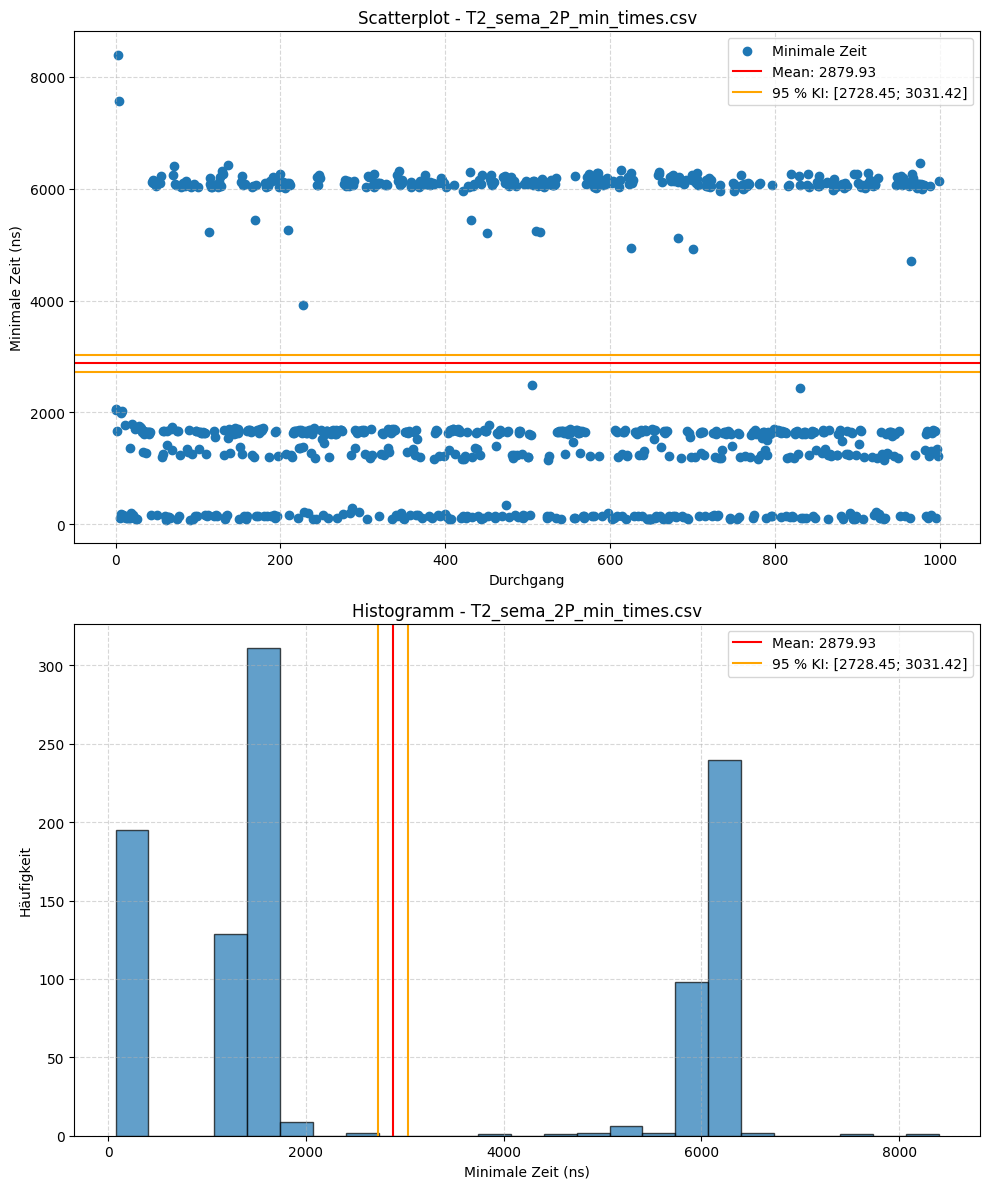

Erstelle Scatterplot und Histogramm für Ordner: T3_zmq_inproc_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T3_zmq_inproc_min_times.csv gespeichert als results/scatter_histogram_T3_zmq_inproc_min_times.eps


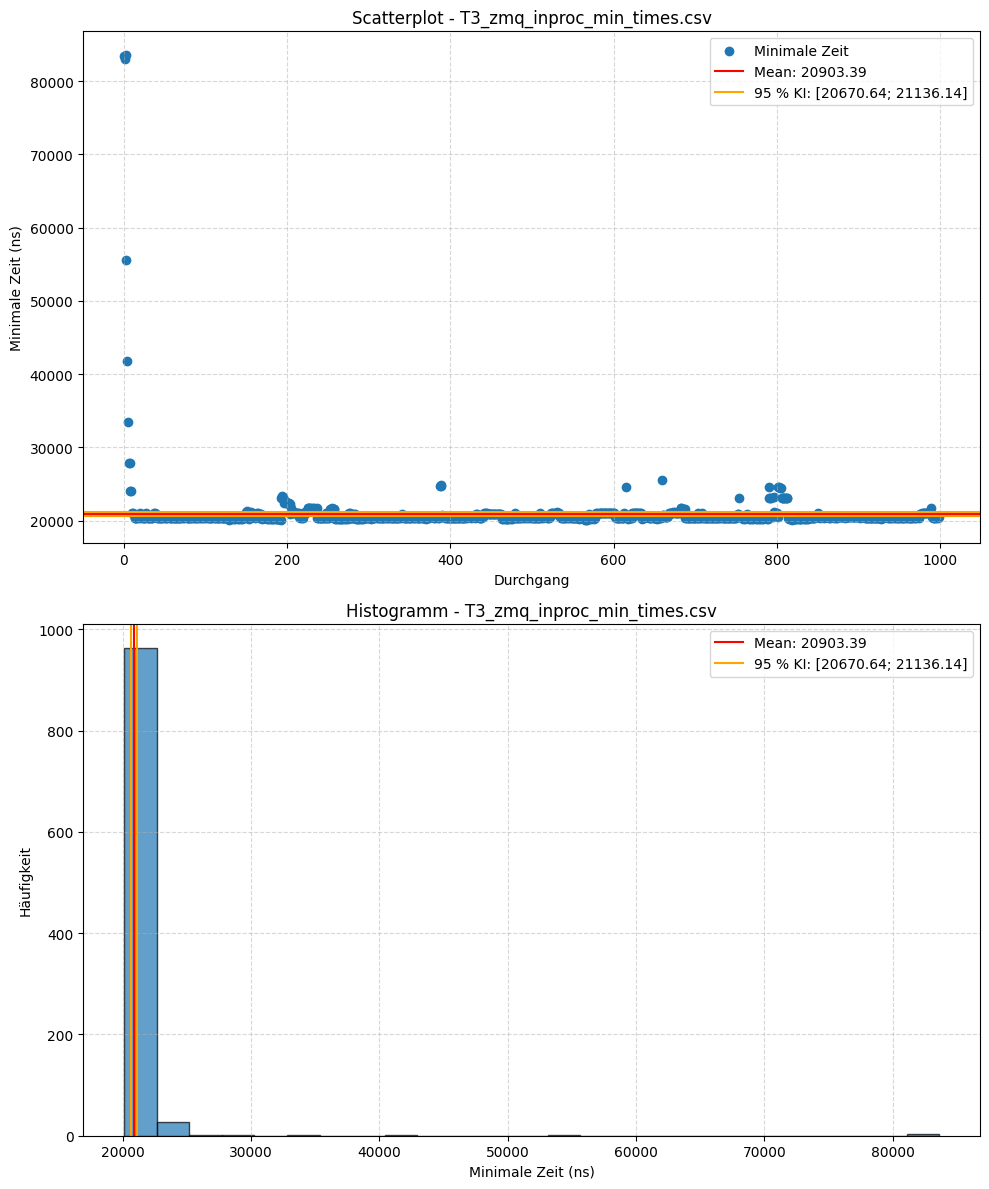

Erstelle Scatterplot und Histogramm für Ordner: T3_zmq_ipc_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T3_zmq_ipc_min_times.csv gespeichert als results/scatter_histogram_T3_zmq_ipc_min_times.eps


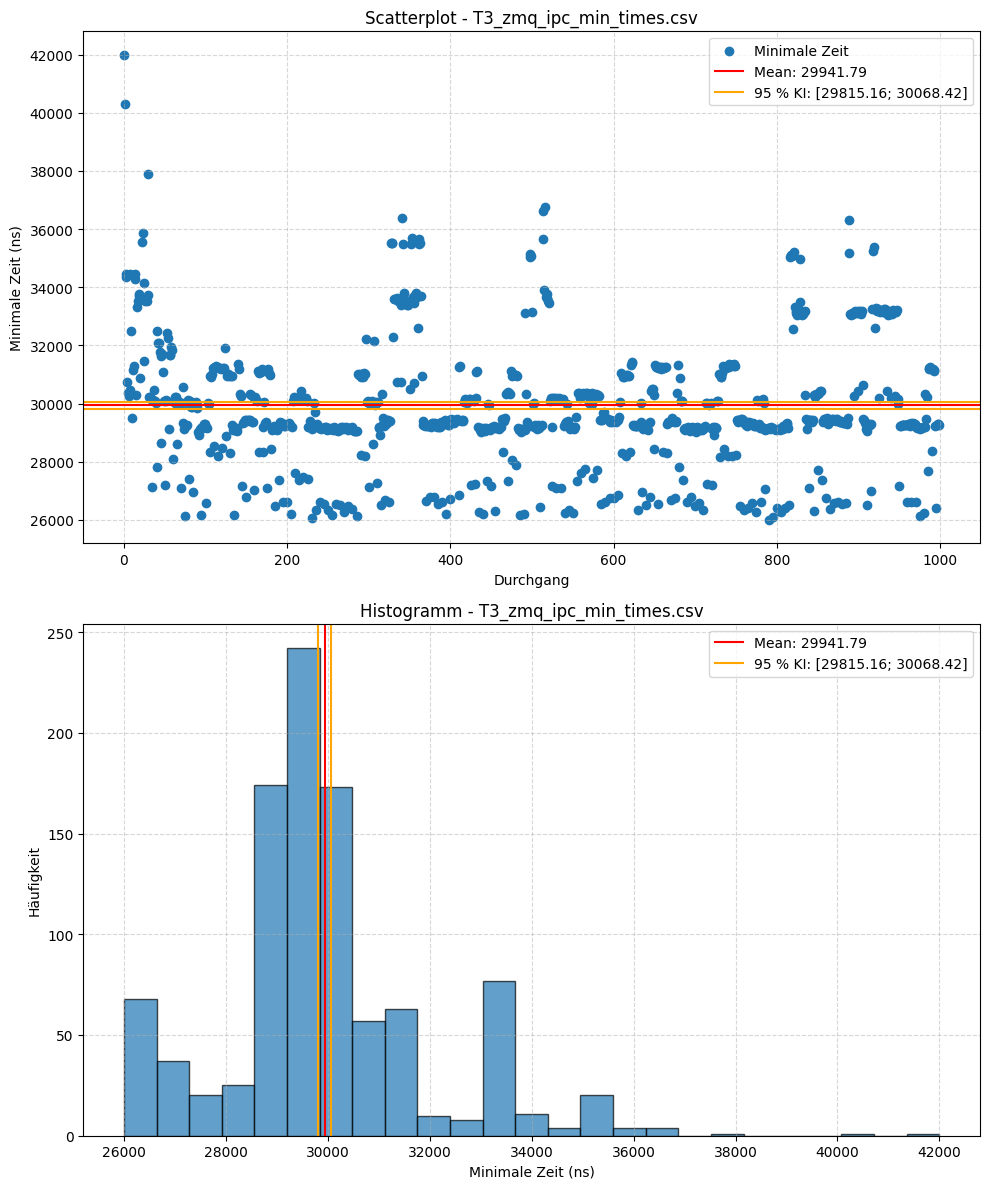

Erstelle Scatterplot und Histogramm für Ordner: T4_tcp_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T4_tcp_min_times.csv gespeichert als results/scatter_histogram_T4_tcp_min_times.eps


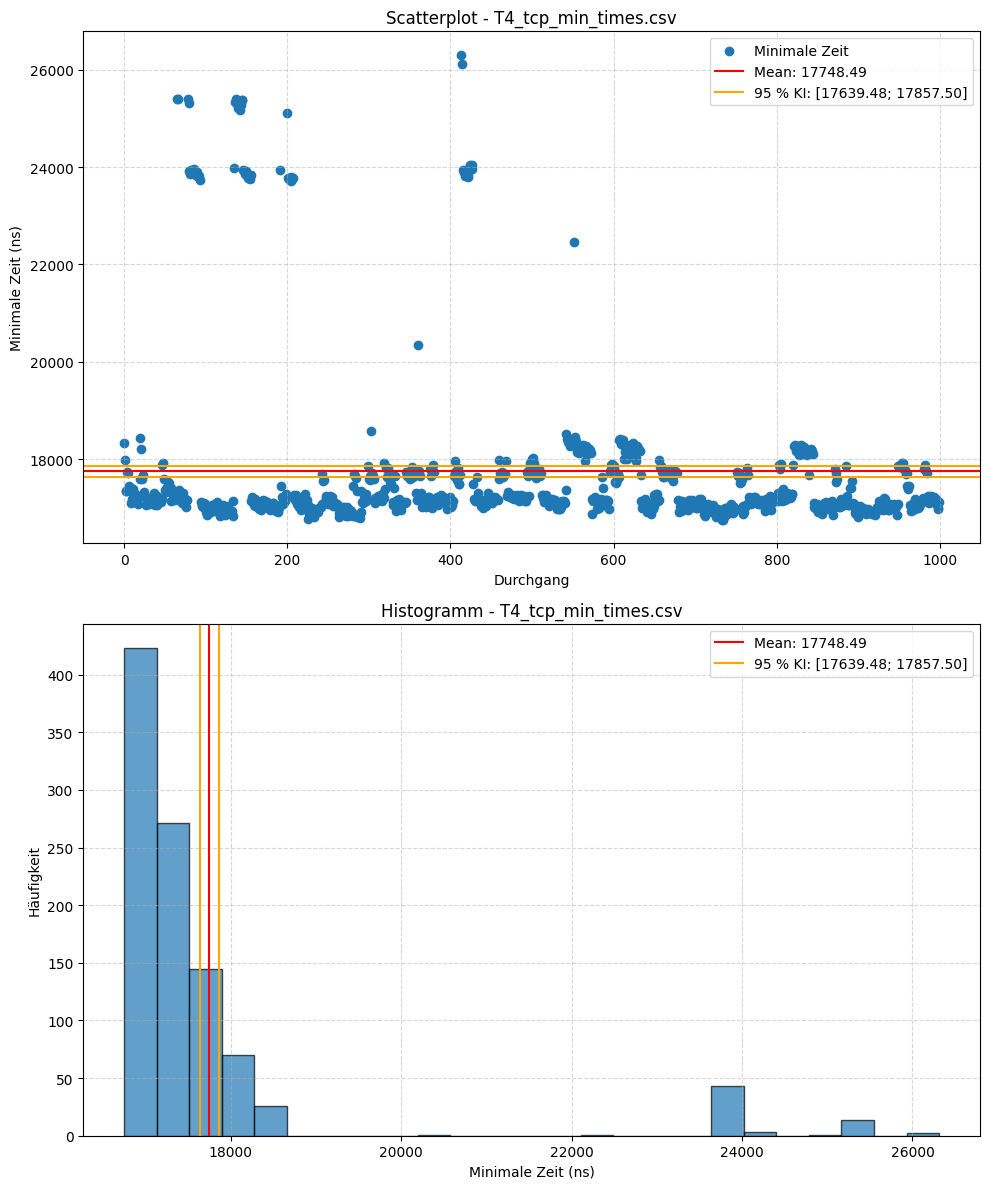

Erstelle Scatterplot und Histogramm für Ordner: T4_zmq_min_times.csv


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Scatterplot und Histogramm für T4_zmq_min_times.csv gespeichert als results/scatter_histogram_T4_zmq_min_times.eps


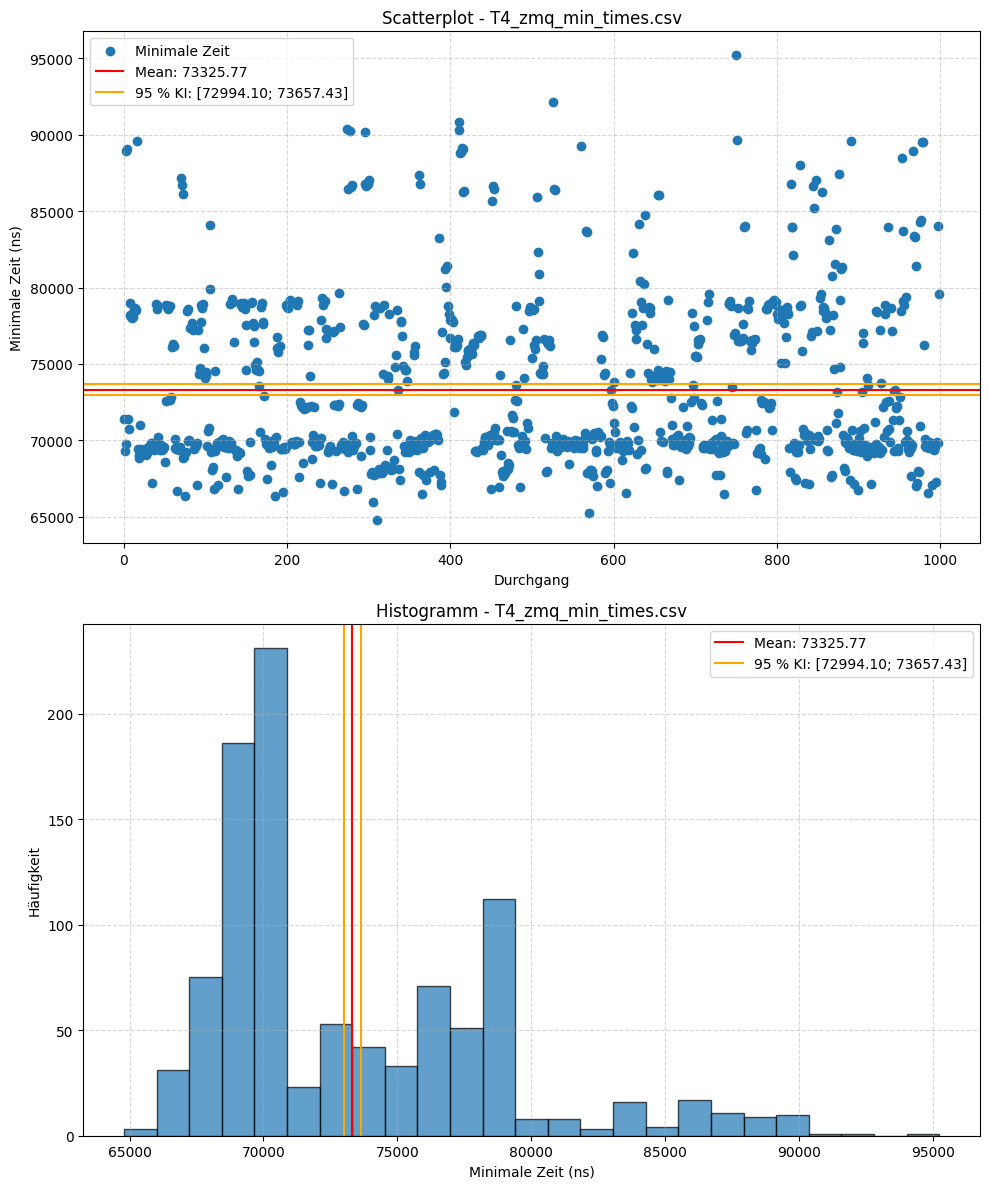

In [5]:
import matplotlib.pyplot as plt


def plot_scatter_and_histogram(eventlogs_dict):
    for log_name, log in eventlogs_dict.items():
        print(f"Erstelle Scatterplot und Histogramm für Ordner: {log_name}")

        times = log['mintime']
        ki = calc_ki(times)  # Annahme: Diese Funktion ist definiert
        mean = times.mean()

        # Erstellen eines neuen Plots mit zwei Subplots (Scatterplot und Histogramm)
        fig, axes = plt.subplots(2, 1, figsize=(10, 12))

        # Scatterplot
        axes[0].scatter(range(len(times)), times, label='Minimale Zeit')
        axes[0].axhline(mean, color='red', label=f'Mean: {mean:.2f}')
        axes[0].axhline(ki[0], color='orange', label=f'95 % KI: [{ki[0]:.2f}; {ki[1]:.2f}]')
        axes[0].axhline(ki[1], color='orange')
        axes[0].set_title(f"Scatterplot - {log_name}")
        axes[0].set_xlabel("Durchgang")
        axes[0].set_ylabel("Minimale Zeit (ns)")
        axes[0].legend()
        axes[0].grid(True, linestyle="--", alpha=0.5)

        # Histogramm
        axes[1].hist(times, bins=25, alpha=0.7, edgecolor='black')
        axes[1].axvline(mean, color='red', label=f'Mean: {mean:.2f}')
        axes[1].axvline(ki[0], color='orange', label=f'95 % KI: [{ki[0]:.2f}; {ki[1]:.2f}]')
        axes[1].axvline(ki[1], color='orange')
        axes[1].set_title(f"Histogramm - {log_name}")
        axes[1].set_xlabel("Minimale Zeit (ns)")
        axes[1].set_ylabel("Häufigkeit")
        axes[1].legend()
        axes[1].grid(True, linestyle="--", alpha=0.5)

        # Anpassen des Layouts
        plt.tight_layout()

        # Speichern der Grafik
        filename = f"results/scatter_histogram_{log_name.replace(' ', '_')[:-4]}.eps"
        plt.savefig(filename, format='eps')
        print(f"Scatterplot und Histogramm für {log_name} gespeichert als {filename}")
        plt.show()

        # Schließen der Grafik, um Speicher freizugeben
        plt.close()


# Beispielaufruf
plot_scatter_and_histogram(all_logs)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


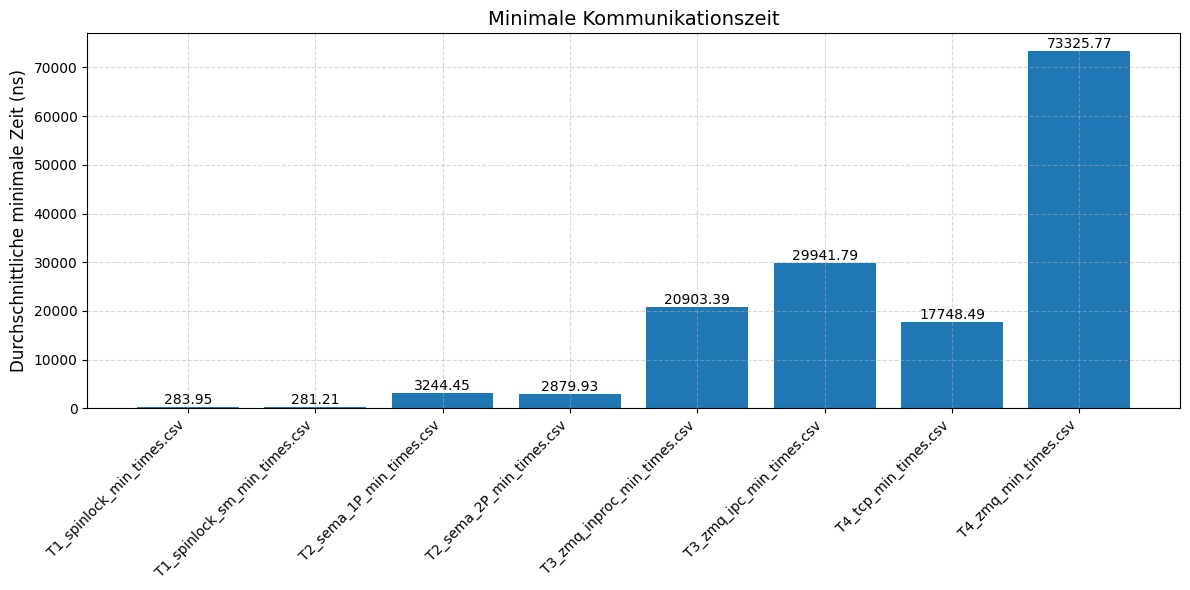

In [6]:
def plot_bar(eventlogs_dict):
    # Extrahiere die Keys (Ordnernamen) und deren Mittelwerte
    folder_names = list(eventlogs_dict.keys())
    mean_values = [log['mintime'].mean() for log in eventlogs_dict.values()]

    # Barplot erstellen
    plt.figure(figsize=(12, 6))
    bars = plt.bar(range(len(folder_names)), mean_values)

    # X-Achsen-Beschriftungen (Ordnernamen)
    plt.xticks(range(len(folder_names)), folder_names, rotation=45, ha="right")

    # Achsentitel und Plot-Titel
    plt.ylabel("Durchschnittliche minimale Zeit (ns)", fontsize=12)
    plt.title("Minimale Kommunikationszeit", fontsize=14)

    # Werte oberhalb der Bars anzeigen
    for bar, value in zip(bars, mean_values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}',
                 ha='center', va='bottom', fontsize=10)

    plt.grid(True, linestyle="--", alpha=0.5)

    # Speichern und anzeigen
    plt.tight_layout()
    plt.savefig("results/barplot_means.eps", format='eps')
    plt.show()


# Beispielaufruf
plot_bar(all_logs)


In [7]:
def summary(eventlogs_dict):
    summary = []
    for log_name, log in eventlogs_dict.items():
        mean = log['mintime'].mean()
        ki = calc_ki(log['mintime'])
        std = log['mintime'].std()

        # Speichern der Statistik in einer Liste
        summary.append({
            'Log Name': log_name,
            'Mean': round(mean, 2),
            '95% KI Lower': round(ki[0], 2),
            '95% KI Upper': round(ki[1], 2),
            'Standard Deviation': round(std, 2)
        })

    # Erstellen einer DataFrame aus den gesammelten Daten
    summary_df = pd.DataFrame(summary)

    # Speichern der Tabelle als CSV-Datei
    summary_filename = "results/statistics.csv"
    summary_df.to_csv(summary_filename, index=False)
    print(summary_df)


summary(all_logs)

                       Log Name      Mean  95% KI Lower  95% KI Upper  \
0     T1_spinlock_min_times.csv    283.96        275.67        292.24   
1  T1_spinlock_sm_min_times.csv    281.21        280.10        282.33   
2      T2_sema_1P_min_times.csv   3244.45       3082.35       3406.54   
3      T2_sema_2P_min_times.csv   2879.93       2728.45       3031.42   
4   T3_zmq_inproc_min_times.csv  20903.39      20670.64      21136.14   
5      T3_zmq_ipc_min_times.csv  29941.79      29815.16      30068.42   
6          T4_tcp_min_times.csv  17748.49      17639.48      17857.50   
7          T4_zmq_min_times.csv  73325.77      72994.10      73657.43   

   Standard Deviation  
0              133.62  
1               18.05  
2             2615.30  
3             2444.13  
4             3755.35  
5             2043.13  
6             1758.84  
7             5351.20  
